## pairing analysis of pdbs

In [1]:
import subprocess
import pandas as pd

/tmp/ipykernel_3579770/3046716316.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def structures_to_db(structures):
    output = ''
    first = structures[0]
    second = structures[1].replace('(', '[').replace(')', ']')
    third = structures[2].replace('(', '{').replace(')', '}')
    for i in range(len(first)):
        if second[i]=='.' and third[i]=='.':
            output += first[i]
        else:
            if third[i]=='.':
                output += second[i]
            else:
                output += third[i]
    return output


In [3]:
structures_to_db([
    '..((((((((((((......(((.........))).((((...........)))).))))))))))))..........................',
'.................(((............................................................)))...........',
'............................................((((.....................................)))).....',
])

'..((((((((((((...[[[(((.........))).((((....{{{{...)))).))))))))))))............]]]..}}}}.....'

In [4]:
MC = '/scr/aldea/kgutenbrunner/opt/MC-Annotate'
dtv_pdb = '/scr/aldea/kgutenbrunner/working/xrRNA_design/analysis/DTV/DTV.pdb'
output_mc = '/scr/aldea/kgutenbrunner/working/analysis/outputs/DTV_all/data/MC_annotation/ref_mc.out'

In [5]:
def get_bp(mc_annotation, shift = 0):
    with open(mc_annotation, 'r') as f:
        outputs = []
        read = False
        for line in f.readlines():
            if read:
                outputs.append(line.replace('\n',''))
            if line.startswith('Base-pairs'):
                read = True


    bps = []
    for output in outputs:
        # print(output)
        output = output.split()
        bp_num = output[0].replace('A', '').split('-')
        bp_nt = output[2].split('-')
        bp_type = output[3]
        parallelity = None
        conformation = None
        if output[4] != 'pairing':
            bp_type += ' ' + output[4]
        if len(output) >= 7:
            parallelity = output[5]
            conformation = output[6]
        bps.append([int(bp_num[0]) + shift, int(bp_num[1]) + shift, bp_nt[0], bp_nt[1], bp_type, parallelity, conformation])
    # mc_data = data.split('\m')
    # mc_data
    df_bp = pd.DataFrame(bps, columns=['bpA', 'bpB', 'ntA', 'ntB', 'type', 'parallelity', 'conformation']) #columns=['bpA', 'bpB', 'ntA', 'ntB', 'type', 'parallelity', 'conformation']
    return df_bp

### DTV

In [6]:
ref_mc = '/scr/aldea/kgutenbrunner/working/analysis/outputs/DTV_all/data/MC_annotation/ref_mc.out'
ref_bps = get_bp(ref_mc)

In [7]:
ref_bps.set_index('bpA')

,bpB,ntA,ntB,type,parallelity,conformation
bpA,,,,,,
1,73,C,G,Ww/Ww,antiparallel,cis
2,70,A,U,Ww/Ww,antiparallel,cis
3,69,G,C,Ww/Ww,antiparallel,cis
4,67,G,C,Ww/Ww,antiparallel,cis
5,66,G,U,Ww/Ws,antiparallel,cis
6,65,G,C,Ww/Ww,antiparallel,cis
7,64,G,U,Ww/Ws,antiparallel,cis
8,63,U,A,Ww/Ww,antiparallel,cis
9,62,G,C,Ww/Ww,antiparallel,cis


all interactions of stem II or helix II 

In [8]:
ref_bps.loc[(ref_bps['bpA'] > 20) & (36 > ref_bps['bpA']) ].set_index('bpA')

,bpB,ntA,ntB,type,parallelity,conformation
bpA,,,,,,
21,35,C,G,Ww/Ww,antiparallel,cis
22,34,A,U,Ww/Ww,antiparallel,cis
23,33,C,G,Ww/Ww,antiparallel,cis
25,31,A,U,Ww/Ww,antiparallel,cis
25,57,A,C,Bh/O2P,None,None
28,78,A,U,Bh/O2',None,None
29,79,C,U,Ww/O2' Bh/O2',None,None


we see that we don't have a lot of interaction, <br>
the W/W interaction which form helix, <br>
two pairing with the end of the sequence, before the PK1. PK1 goes from 81-83<br>
one pairing with 57? 57 is part of stem alpha and part of the last bp within stem alpha. maybe important?

#### bad simulation
the following simulations all fold into a same structure <br>
again consider all interaction of the helix II and the HPL II

In [9]:
bp_pais = ['Ww/Ww', 'Ws/WhlmMC']

In [10]:

# 04_30
seq_04_30 = 'GCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCAAAAAAAUAAAAUGCGACC'
ss_04_30 = r'((((((((((((...[[[((((........)))).((((((..{{{{..)))))).))))))))))))............]]]}}}}'

ref_mc = '/scr/aldea/kgutenbrunner/working/analysis/outputs/DTV_all/data/MC_annotation/04_30_mc.out'
sim_bad_bps = get_bp(ref_mc)
sim_bad_bps.loc[(sim_bad_bps['bpA'] > 18) & (35 > sim_bad_bps['bpA']) ].set_index('bpA')

,bpB,ntA,ntB,type,parallelity,conformation
bpA,,,,,,
19,34,C,G,Ww/Ww,antiparallel,cis
19,80,C,A,Ws/Wh,antiparallel,cis
20,33,C,G,Ww/Ww,antiparallel,cis
20,79,C,A,Ws/Wh,antiparallel,cis
21,32,G,C,Ww/Ww,antiparallel,cis
21,77,G,A,Ss/Hh O2'/Bh,pairing,antiparallel
21,78,G,A,O2'/Ww,None,None
22,31,G,C,Ww/Ww,antiparallel,cis
23,30,G,A,Bs/Hh Ww/O2P,Bs/O2P,pairing


we see way more interactions, and way more interaction between the loop and the region before PK1. <br>
there are also interactions between the helix and the region before PK1.<br>
PK1 starts at 81

In [11]:
# 05_03
ref_mc = '/scr/aldea/kgutenbrunner/working/analysis/outputs/DTV_all/data/MC_annotation/05_03_mc.out'
seq_05_03 = 'GCCCGAGUGGAGGCAGCACCGCAAUUGAACGCGGACCCCCAAUGGUCAGGGGGACUCCAUUUGGGCAAAAAAUUAAAAUGCUCGACC'
ss_05_03 = r'((((((((((((...[[[((((........)))).(((((...{{{{.))))).))))))))))))............]]]..}}}}'

sim_bad_bps_2 = get_bp(ref_mc)
sim_bad_bps_2.loc[(sim_bad_bps_2['bpA'] > 18) & (35 > sim_bad_bps_2['bpA']) ].set_index('bpA')

,bpB,ntA,ntB,type,parallelity,conformation
bpA,,,,,,
19,34,C,G,Ww/Ww,antiparallel,cis
20,33,C,G,Ww/Ww,antiparallel,cis
20,77,C,A,Bs/Wh,antiparallel,cis
21,32,G,C,Ww/Ww,antiparallel,cis
21,75,G,A,Ss/Hh,antiparallel,trans
22,31,C,G,Ww/Ww,antiparallel,cis
23,74,A,U,Bs/Wh,antiparallel,cis
24,26,A,U,Hh/O2P inward,None,None
24,73,A,U,Ss/Ww,antiparallel,cis


In [12]:
# 05_04
ref_mc = '/scr/aldea/kgutenbrunner/working/analysis/outputs/DTV_all/data/MC_annotation/05_04_mc.out'
seq_05_04 = 'GCCAGAGGCCUGGCAGCACCGGGAAAUCGCCCGGACCCCGCUAGGUCGCGGGGACAGGCCUCUGGCGAAAAAAAAAAAAUGCGGACC'
ss_05_04 = r'((((((((((((...[[[(((((......))))).((((((..{{{{)))))).)))))))))))).............]]].}}}}'

sim_bad_bps_3 = get_bp(ref_mc)
sim_bad_bps_3.loc[(sim_bad_bps_3['bpA'] > 18) & (35 > sim_bad_bps_3['bpA']) ].set_index('bpA')

,bpB,ntA,ntB,type,parallelity,conformation
bpA,,,,,,
19,34,C,G,Ww/Ww,antiparallel,cis
19,79,C,A,Ws/Wh,antiparallel,cis
20,33,C,G,Ww/Ww,antiparallel,cis
20,78,C,A,O2'/Ww,None,None
21,32,G,C,Ww/Ww,antiparallel,cis
21,76,G,A,Ss/Wh,antiparallel,trans
22,31,G,C,Ww/Ww,antiparallel,cis
23,30,G,C,Ww/Ww,antiparallel,cis
23,72,G,A,Bs/O2',None,None


In [13]:
# 05_01_edited
ref_mc = '/scr/aldea/kgutenbrunner/working/analysis/outputs/DTV_all/data/MC_annotation/05_01_edited_mc.out'
seq_05_01_edited = 'GAACGUAUCCGGGCAGCACUACGGUAAACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAAAUAAUGCCGACC'
ss_05_01_edited = '((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}'

sim_bad_bps_4 = get_bp(ref_mc)
sim_bad_bps_4.loc[(sim_bad_bps_4['bpA'] > 17) & (34 > sim_bad_bps_4['bpA']) ].set_index('bpA')

,bpB,ntA,ntB,type,parallelity,conformation
bpA,,,,,,
18,80,A,U,Ww/Ww,antiparallel,cis
19,33,C,G,Ww/Ww,antiparallel,cis
19,79,C,A,Ws/Wh,antiparallel,cis
20,32,U,A,Ww/Ww,antiparallel,cis
20,78,U,A,Ss/Bs,antiparallel,cis
21,31,A,U,Ww/Ww,antiparallel,cis
21,77,A,U,Ss/Ww,antiparallel,cis
22,30,C,G,Ww/Ww,antiparallel,cis
23,29,G,C,Ww/Ww,antiparallel,cis


conclusion: <br>
maybe include 25-57 pair into design, 57 is always a c, since it part of the GAC within the ML connecting HLIII and stem I --> already included since 25 is also part of the ML <br> 
limit the possible pairing of HL II and the region before pk1. 2 are apparently ok, but allow not too many --> try implementing this into sequence-design

In [14]:
import varnaapi
from varnaapi import Structure


In [15]:
def create_varna(seq, ss, non_canonical_bp):
    v = varnaapi.Structure(sequence=seq, structure=ss)
    # v.add_aux_BP(14, 20, edge5="s", color="#FF00FF")
    v.update(bpStyle='simple', drawBackbone=True, bp='#006400', fillBases=True, spaceBetweenBases=1, resolution=1.2)
    v.show()


['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU', '-structureDBN', '..((((((((((((...[[[(((.........)))..(((..{{{{..{{{)))..))))))))))))............]]]..}}}}}}}..', '-o', '/tmp/tmpoxwjc63l.png', '-bp', '#006400', '-resolution', '1.2', '-bpStyle', 'simple']


Output file: /tmp/tmpoxwjc63l.png



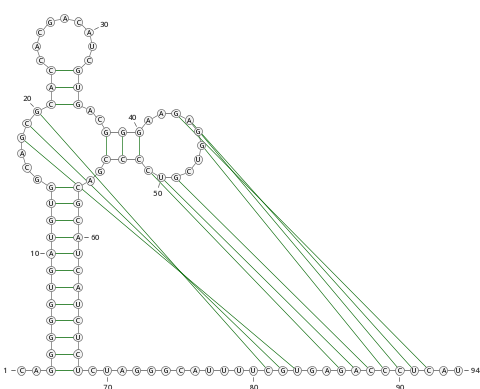

In [16]:
seq = 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU'
ss =  '..((((((((((((...[[[(((.........)))..(((..{{{{..{{{)))..))))))))))))............]]]..}}}}}}}..'
create_varna(seq,ss, [])

['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '', '-structureDBN', '((((((.((((((........)))))).((((((.......))))))..))))))', '-o', '/tmp/tmp1ftyga0h.png', '-auxBPs', '(14,20):edge5=h,color=#ff00ff']


Output file: /tmp/tmp1ftyga0h.png



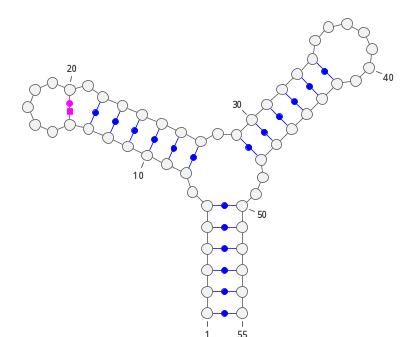

In [17]:
from varnaapi import Structure
v = Structure(structure="((((((.((((((........)))))).((((((.......))))))..))))))")
v.add_aux_BP(14, 20, edge5="h", color="#FF00FF")
v.show()

## all BP types of MC

Ww/Ww trans [GC, AU, GU] <br>
Ww/Ww cis [GC, AU, GU] <br>
Hw/Ww trans [AC, AU]<br>
Hw/Ww cis [AC, GU] <br>
Hh/Hh trans [GC] <br>
Ss/Ws trans [AU] <br>
Ss/Ws cis [GU, AU] <br>
Ww/Bs trans [GU] <br>
Bh/Ww cis [AC] <br>
Ww/Bh cis [GU]<br>
Ww/Bs cis [GC] <br>
Bs/Ww cis [GC]<br>

Ww/Ww trans [AA] <br>
Ww/Ss trans [AG] <br>
Ww/Hh trans [AA, GG] <br>
Ww/Ww cis [AG]<br> 
Bh/Ww cis [GG]<br>
Hh/Ww cis [GG, AG]<br>
Hh/Ss trans [AA, AG] <br>
Ss/Ss trans [AG, GG]<br>
Hh/Bs cis [GG]<br>
Hh/Hh trans [AA] <br>
Bh/Ww trans [GG]<br>
Ww/Hh trans [UU] <br>
Ww/Ww trans [UU]<br>
Ww/Ww cis [UC, UU] <br>


In [18]:
cis = 'cis'
trans = 'trans'
bp_types = {('Bh/Ww', cis): ['AC'] +  ['GG'],
('Bh/Ww', trans): ['GG'],
('Bs/Ww', cis): ['GC'],
('Hh/Bs', cis): ['GG'],
('Hh/Hh', trans): ['AA'] + ['GC'],
('Hh/Ss', trans): ['AA', 'AG'],
('Hh/Ww', cis): ['GG', 'AG'],
('Hw/Ww', cis): ['AC', 'GU'],
('Hw/Ww', trans): ['AC', 'AU'],
('Ss/Ss', trans): ['AG', 'GG'],
('Ss/Ws', cis): ['GU', 'AU'],
('Ss/Ws', cis): ['AU'],
('Ww/Bh', cis): ['GU'],
('Ww/Bs', cis): ['GC'],
('Ww/Bs', trans): ['GU'],
('Ww/Hh', trans): ['AA', 'GG'] + ['UU'],
('Ww/Ss', trans): ['AG'],
('Ww/Ww', cis): ['GC', 'AU', 'GU'] + ['UC', 'UU'] + ['AG'],
('Ww/Ww', trans): ['GC', 'AU', 'GU'] + ['UU'] + ['AA']}

In [19]:
bp_types

{('Bh/Ww', 'cis'): ['AC', 'GG'],
 ('Bh/Ww', 'trans'): ['GG'],
 ('Bs/Ww', 'cis'): ['GC'],
 ('Hh/Bs', 'cis'): ['GG'],
 ('Hh/Hh', 'trans'): ['AA', 'GC'],
 ('Hh/Ss', 'trans'): ['AA', 'AG'],
 ('Hh/Ww', 'cis'): ['GG', 'AG'],
 ('Hw/Ww', 'cis'): ['AC', 'GU'],
 ('Hw/Ww', 'trans'): ['AC', 'AU'],
 ('Ss/Ss', 'trans'): ['AG', 'GG'],
 ('Ss/Ws', 'cis'): ['AU'],
 ('Ww/Bh', 'cis'): ['GU'],
 ('Ww/Bs', 'cis'): ['GC'],
 ('Ww/Bs', 'trans'): ['GU'],
 ('Ww/Hh', 'trans'): ['AA', 'GG', 'UU'],
 ('Ww/Ss', 'trans'): ['AG'],
 ('Ww/Ww', 'cis'): ['GC', 'AU', 'GU', 'UC', 'UU', 'AG'],
 ('Ww/Ww', 'trans'): ['GC', 'AU', 'GU', 'UU', 'AA']}

In [20]:
seq = 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU'

In [21]:
import random
nts = list('ACGU')

In [22]:
def random_sampler():
    new_seq = ['-' ]* 13 + list('GGCAGCRC') +  ['-' ]* 23 + list('GGUC') + ['-' ]* 32 + list('CGU--GACC') +  ['-' ]* 5
    random_nr = 0
    for i in range(1, len(seq)+1):
        seq_i = i - 1
        if new_seq[seq_i] == '-':
            if i in ref_bps.index:
                if len(ref_bps.loc[i]) != 2:
                    bp_type = (ref_bps.loc[i]['type'], ref_bps.loc[i]['conformation'])
                    if bp_type in bp_types.keys():
                        random_nt = random.choice(bp_types[bp_type])
                        seq_j = ref_bps.loc[i]['bpB'] - 1
                        new_seq[seq_i] = random_nt[0]
                        new_seq[seq_j] = random_nt[1]
                    else:
                        new_seq[seq_i] = random.choice(nts)
                        random_nr += 1
            else:
                new_seq[seq_i] = random.choice(nts)
                random_nr += 1
    return ''.join(new_seq), random_nr
    # print(''.join(new_seq))

In [23]:
new_seq, random_nr = random_sampler()
print(ss)
print(new_seq)
print(seq)
print('0123456789'*10)
print(random_nr / len(new_seq) * 100)

..((((((((((((...[[[(((.........)))..(((..{{{{..{{{)))..))))))))))))............]]]..}}}}}}}..
GGUAGCUGUUUAUGGCAGCRCUUGAUCUGUUACUCAGAAUGUAUGGUCACAUCCCCUGCCUCUCCCUGCCUGUGAAUUUCCGUUUGCUCGUUCC
CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU
0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789
36.17021276595745


In [24]:
import RNA

In [25]:
def target_fc(seq, ss):
    fc = RNA.fold_compound(seq)
    fc.pf()
    freq = fc.pr_structure(ss)
    return freq

In [26]:
from tqdm import tqdm

In [27]:
def optimizer(steps = 1000):
    base_ss = '..((((((((((((......(((.........))).((((...........)))).))))))))))))..........................'
    best_seq, random_nr = random_sampler()
    best_val = target_fc(best_seq, base_ss)
    for _ in tqdm(range(steps)):
        new_seq, random_nr = random_sampler()
        new_val = target_fc(new_seq, base_ss)
        if new_val > best_val:
            best_seq = new_seq
            best_val = new_val
    return best_seq, round(best_val, 2)

optimizer(100000)

  0%|          | 28/100000 [00:00<32:41, 50.98it/s]

100%|██████████| 100000/100000 [29:50<00:00, 55.86it/s]


('UUACGGGGGUACAGGCAGCRCAAGGAAUUACACGGAGAGGGGUCGGUCGAGUCUCACAGUCCCACGGCCCCGUAGGUUAUCGUUUGUUCAUGUG',
 0.0)

In [28]:
fc = RNA.fold_compound(new_seq)
fc.pf()
(ss, mfe) = fc.mfe()

In [29]:
new_seq = 'AUGUGUGUGAUAUGGCAGCRCGGGUAUAUUCGUCCUUAGGAAUUGGUCGUGCCUUUUAUUUCCCCCUCUGUCCCGAAUUGCGUCCGUUCGUACA'
print(ss)
print(new_seq)
print(seq)
print('0123456789'*10)

(((((........(((((....(((((...(((.......))).)))))......))))).....))))).((((((....)))))).......
AUGUGUGUGAUAUGGCAGCRCGGGUAUAUUCGUCCUUAGGAAUUGGUCGUGCCUUUUAUUUCCCCCUCUGUCCCGAAUUGCGUCCGUUCGUACA
CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU
0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789


random sampling from the MC annotation does not work

In [ ]:
seq = 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU'
ss = '..((((((((((((......(((.........))).((((...........)))).))))))))))))..........................'


def target_frequency(sequence, model_input):
    target = model_input.structures[0]
    ss = remove_positioned_gaps(sequence, target)
    fc = RNA.fold_compound(sequence.replace('-',''))
    fc.pf()
    return fc.pr_structure(ss)


In [ ]:
import RNA

In [ ]:
fc = RNA.fold_compound(seq.replace('-',''))
fc.pf()
fc.pr_structure(ss)

1.0259597086704044e-08

added nt infront, change a C to a U in the polyC, but also deleted some Cs and also added some nt in the end. 

In [ ]:
seq =   'CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCCCCCUGCGACCCUC'
ss = [  '.((((((((((((......((((........)))).((((((........)))))).))))))))))))....................',
        '................(((............................................................))).......',
        '............................................((((..................................))))...']


In [ ]:
for i in range(69, 79):
    new_seq = list(seq)
    new_seq[i] = 'U'
    new_seq = ''.join(new_seq)
    fc = RNA.fold_compound(new_seq.replace('-',''))
    fc.pf()
    print(new_seq)
    print(fc.pr_structure(ss[0]))

CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCUCCCCCCCCCUGCGACCCUC
0.8490553674449741
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCUCCCCCCCCUGCGACCCUC
0.8383130816216733
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCUCCCCCCCUGCGACCCUC
0.8369274888488488
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCUCCCCCCUGCGACCCUC
0.7816346092429353
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCUCCCCCUGCGACCCUC
0.8317833495686178
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCUCCCCUGCGACCCUC
0.7794815068198173
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCUCCCUGCGACCCUC
0.8207186660142979
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCCUCCUGCGACCCUC
0.8035558457868016
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCCCUCUGCGACCCUC
0.8610292741257691
CGCGACCGGUCAGGCAGCA

In [ ]:
seq_04_30_edited = 'CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCUCCCUGCGACCCUC'

89

change end of 05_01 to C instead of As

In [ ]:
seq = 'CGAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCCCCCCCCCCUAUAAUGCCGACC'
ss = ['.((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
      '................(((.............................................................))).....',
      '..........................................((((......................................))))']

In [ ]:
fc = RNA.fold_compound(seq.replace('-',''))
fc.pf()

print(fc.pr_structure(ss[0]))

0.8955871925918893


In [ ]:
for i in ss:
    print(i)

.((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................
................(((.............................................................))).....
..........................................((((......................................))))
